In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Data Science YT\datasets\salary.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
inputs=df.drop('salary_more_then_100k',axis=1)
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [8]:
target=df.salary_more_then_100k
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [12]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [15]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n # google=2, abc pharma=0,facebook=1
#sales exe=2,business manager=0,computer programmer=1
#bachelors=0,masters=1

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


# Decision Tree Model

In [16]:
from sklearn import tree

In [17]:
model=tree.DecisionTreeClassifier()

In [18]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n,target)

1.0

In [21]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [22]:
model.predict([[2,0,1]])

array([1], dtype=int64)

# Exercise

In [38]:
ds=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Data Science YT\datasets\titanic.csv")
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
y=ds.Survived

In [53]:
y.isna().sum()

0

In [58]:
x=ds[['Pclass','Sex','Age','Fare']]
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [59]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [60]:
mean_age=x.Age.mean()
mean_age

29.69911764705882

In [61]:
x.Age=x.Age.fillna(29)

C:\Users\priya\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [65]:
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
x['Sex_n']=le.fit_transform(x['Sex'])
x_n=x.drop(['Sex'],axis=1)
x_n.head() #male=1,female=0

<ipython-input-67-543e21280351>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex_n']=le.fit_transform(x['Sex'])


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_n_train,x_n_test,y_train,y_test=train_test_split(x_n,y,test_size=0.4)

In [70]:
len(x_n_train)

534

In [71]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [72]:
model.fit(x_n_train,y_train)

DecisionTreeClassifier()

In [73]:
model.score(x_n_test,y_test)

0.7871148459383753

In [74]:
model.predict([[1,38.0,71.2833,0]])

array([1], dtype=int64)

In [76]:
y_predicted=model.predict(x_n_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[186,  32],
       [ 44,  95]], dtype=int64)

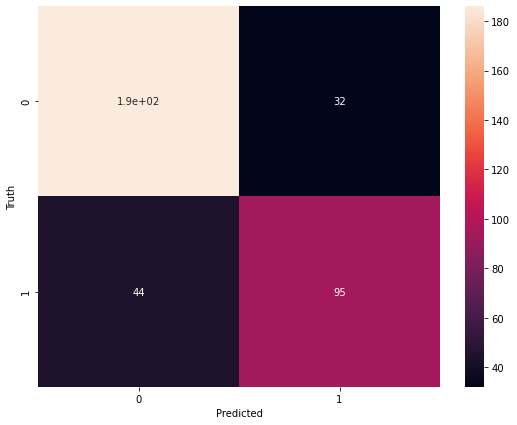

In [81]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()